In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [12]:
col=['user_Id','item_id','rating','timestamp']
DF=pd.read_csv("D:/bg/ml-100k/u.data",sep='\t',names=col)
DF.head()

,user_Id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [86]:
movie_names=pd.read_csv("D:/bg/ml-100k/u.item",sep='\|',header=None)

movie_names=movie_names[[0,1]]

movie_names.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
movie_names=pd.read_csv("D:/bg/ml-100k/u.item",sep='\|',header=None)
movie_names=movie_names[[0,1]]
movie_names.columns=['item_id','movie_name']
movie_names.head()

,item_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
Df=pd.merge(DF,movie_names,on='item_id')
Df.head()

,user_Id,item_id,rating,timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [17]:
import seaborn as sns

In [20]:
Df.groupby('movie_name').mean()['rating'].sort_values(ascending=False)

movie_name
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [26]:
Df.groupby('movie_name').count()['rating'].sort_values(ascending=False)

movie_name
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [28]:
ratings=pd.DataFrame(Df.groupby('movie_name').mean()['rating'])
ratings.head()

,rating
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [29]:
ratings['No of ratings']=pd.DataFrame(Df.groupby('movie_name').count()['rating'])

In [30]:
ratings

,rating,No of ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


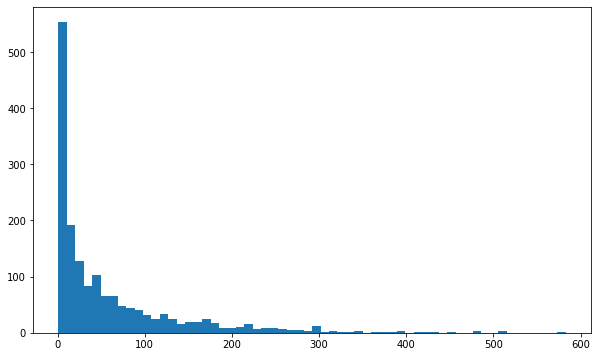

In [41]:
plt.figure(figsize=(10,6))
plt.hist(ratings['No of ratings'],bins=60)
plt.show()

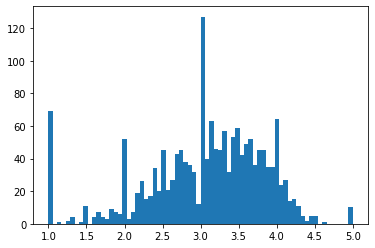

In [40]:
plt.hist(ratings['rating'],bins=70)
plt.show()

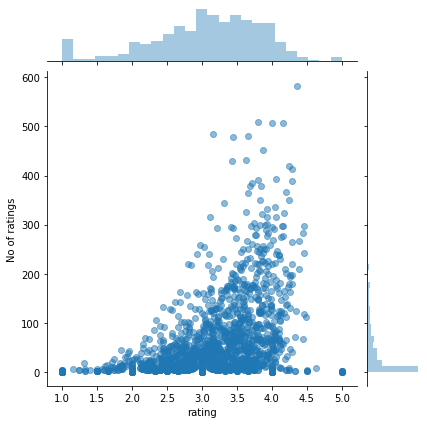

In [45]:
sns.jointplot(x='rating',y='No of ratings',data=ratings,alpha=0.5)

## create recomendation

In [49]:
movie_mat=Df.pivot_table(index='user_Id',columns='movie_name',values='rating')

In [50]:
movie_mat

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
ratings.sort_values('No of ratings',ascending=False)

,rating,No of ratings
movie_name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [54]:
star_war_UR=movie_mat['Star Wars (1977)']

In [55]:
star_war_UR.head()

user_Id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [57]:
similar_to_sw=movie_mat.corrwith(star_war_UR)

In [60]:
cor_of_sw=pd.DataFrame(similar_to_sw,columns=['Co-relation'])

In [61]:
cor_of_sw

,Co-relation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [62]:
cor_of_sw.dropna(inplace=True)

In [64]:
cor_of_sw.head()

,Co-relation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [66]:
cor_of_sw.sort_values('Co-relation',ascending=False)

,Co-relation
movie_name,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [71]:
cor_of_sw=cor_of_sw.join(ratings['No of ratings'])

In [72]:
cor_of_sw.head()


,Co-relation,No of ratings
movie_name,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [73]:
cor_of_sw=cor_of_sw[cor_of_sw['No of ratings']>100]

In [74]:
cor_of_sw.head()

,Co-relation,No of ratings
movie_name,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151


In [78]:
cor_of_sw=cor_of_sw.sort_values('Co-relation',ascending=False)
cor_of_sw

,Co-relation,No of ratings
movie_name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Predict Function

In [110]:
def predict_movies(name):
    movie_rating=movie_mat[name]
    similar_to=movie_mat.corrwith(movie_rating)
    cor_of_sw=pd.DataFrame(similar_to,columns=['Co-relation'])
    cor_of_sw=cor_of_sw.join(ratings['No of ratings'])
    p=ratings['No of ratings'][name]
    
    cor_of_sw=cor_of_sw.sort_values('Co-relation',ascending=False)
    prediction=cor_of_sw[cor_of_sw['No of ratings']>int(p*7/10)]
   
    return prediction
p=predict_movies('Return of the Jedi (1983)')
p[0:20]

,Co-relation,No of ratings
movie_name,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,367
Star Wars (1977),0.672556,583
Raiders of the Lost Ark (1981),0.467391,420
Independence Day (ID4) (1996),0.293522,429
Star Trek: First Contact (1996),0.276310,365
Chasing Amy (1997),0.251425,379
Liar Liar (1997),0.227837,485
"Rock, The (1996)",0.208294,378
